In [1]:
import sys
sys.path.append('../../component')
from utils import *
from run_EDA import run_eda
from run_ARIMA import run_arima
from run_LSTM import set_lstm_data, run_lstm, lstm_eval
import os
os.getcwd()

'/home/ubuntu/Capstone_Group_1/code/main_code/test'

In [2]:
'''EDA'''
path = '../../data/power_consumption.csv'
target = 'power_consumption'
# ts_plt, acf, acf_pacf, rolling_mean_var, decomposition = run_eda(path, 100, 144)

In [3]:
df_train, df_test, train, test = prepare_arima_data(path, target)
print('Train shape', train.shape, '\nTest shape', test.shape)

Train shape (41932, 1) 
Test shape (10484, 1)


In [4]:
'''Order determination: domain knowledge vs. Optuna'''
acf_pacf.show() # ACF tail off, PACF cut off at order = 2
pred, fore = run_arima(path, target, 2, 0, 0)
print(f'Train mse:{MSE(train, pred)}')

AR mse:219930.1666806584


In [7]:
study_ar, best_order_list_ar = optuna_search_ARIMA(train, test,
                                                   ar_max=20, ma_max=None, integ_order=None,
                                                   objective=ARIMA_objective, n_trials=20)
# ar=10

[I 2024-12-02 03:15:38,915] A new study created in memory with name: no-name-56d9fd60-47f5-4ecd-9897-db2896a09c6f
[I 2024-12-02 03:15:40,301] Trial 0 finished with value: 51613255.62136785 and parameters: {'AR_order': 1}. Best is trial 0 with value: 51613255.62136785.
[I 2024-12-02 03:15:47,320] Trial 1 finished with value: 50910571.338277645 and parameters: {'AR_order': 5}. Best is trial 1 with value: 50910571.338277645.
[I 2024-12-02 03:17:22,418] Trial 2 finished with value: 50897791.95943166 and parameters: {'AR_order': 18}. Best is trial 2 with value: 50897791.95943166.
[I 2024-12-02 03:17:43,279] Trial 3 finished with value: 50894492.26465777 and parameters: {'AR_order': 10}. Best is trial 3 with value: 50894492.26465777.
[I 2024-12-02 03:17:59,490] Trial 4 finished with value: 50897882.020881414 and parameters: {'AR_order': 8}. Best is trial 3 with value: 50894492.26465777.
[I 2024-12-02 03:18:52,596] Trial 5 finished with value: 50897962.575433575 and parameters: {'AR_order': 2

Best parameters: {'AR_order': 10}
Best MSE: 50894492.26465777


In [9]:
# MA order = 8
study_ar, best_order_list_ar = optuna_search_ARIMA(train, test,
                                                   ar_max=None, ma_max=20, integ_order=None,
                                                   objective=ARIMA_objective, n_trials=30)
# ma=8

[I 2024-12-02 04:34:42,054] A new study created in memory with name: no-name-8e3c68e9-0039-4a80-9eeb-05fedf6498dc
/home/ubuntu/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
[I 2024-12-02 04:34:57,166] Trial 0 finished with value: 50981071.78864086 and parameters: {'MA_order': 1}. Best is trial 0 with value: 50981071.78864086.
/home/ubuntu/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
[I 2024-12-02 04:35:12,265] Trial 1 finished with value: 50981071.78864086 and parameters: {'MA_order': 1}. Best is trial 0 with value: 50981071.78864086.
/home/ubuntu/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: User

KeyboardInterrupt: 

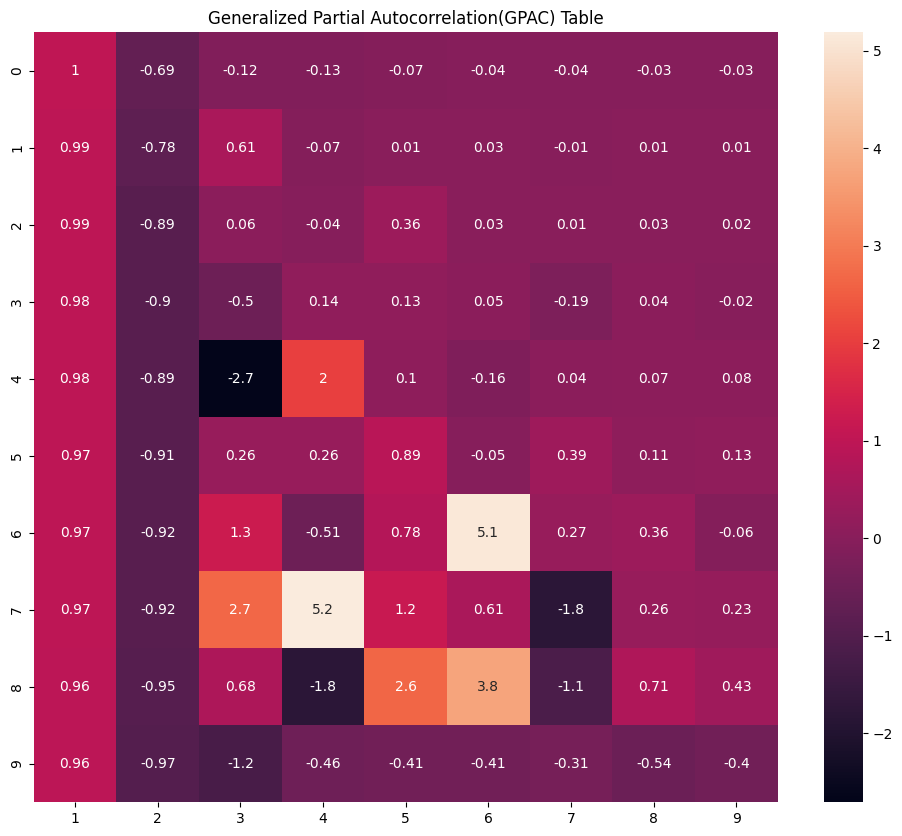

In [4]:
# ARMA
fig = GPAC_table(train, J=10, K=10) # plot the GPAC table for Raw data: ARMA(2,2)
fig.savefig('./gpac/pow.pdf', dpi=300, bbox_inches='tight')

In [11]:
study_ar, best_order_list_ar = optuna_search_ARIMA(train, test,
                                                   ar_max=20, ma_max=20, integ_order=None,
                                                   objective=ARIMA_objective, n_trials=30)
# arma = (4,5)

[I 2024-12-02 06:12:33,909] A new study created in memory with name: no-name-8abef14c-1dd3-425d-9953-d232180dd51c
/home/ubuntu/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/ubuntu/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/ubuntu/.local/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-12-02 06:21:05,405] Trial 0 finished with value: 50902146.981856644 and parameters: {'AR_order': 12, 'MA_order': 17}. Best is trial 0 with value: 5090

Best parameters: {'AR_order': 4, 'MA_order': 5}
Best MSE: 50816673.53668528


In [12]:
study_ar, best_order_list_ar = optuna_search_ARIMA(train, test,
                                                   ar_max=20, ma_max=20, integ_order=1,
                                                   objective=ARIMA_objective, n_trials=20)

[I 2024-12-02 07:40:28,520] A new study created in memory with name: no-name-5a54d858-6ac1-434d-a482-df47c141bde5
/home/ubuntu/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/ubuntu/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/ubuntu/.local/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-12-02 07:43:58,779] Trial 0 finished with value: 56593928.041873164 and parameters: {'AR_order': 15, 'MA_order': 9}. Best is trial 0 with value: 56593

Best parameters: {'AR_order': 12, 'MA_order': 6}
Best MSE: 47438666.930064864


In [13]:
study_ar, best_order_list_ar = optuna_search_ARIMA(train, test,
                                                   ar_max=20, ma_max=20, integ_order=2,
                                                   objective=ARIMA_objective, n_trials=20)
# ARIMA(20, 2, 1)

[I 2024-12-02 08:32:02,264] A new study created in memory with name: no-name-2f226143-7ea4-4b62-859e-5a68d7109bf7
/home/ubuntu/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/ubuntu/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/ubuntu/.local/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[I 2024-12-02 08:35:24,667] Trial 0 finished with value: 103560459.63206337 and parameters: {'AR_order': 11, 'MA_order': 11}. Best is trial 0 with value: 1035

Best parameters: {'AR_order': 20, 'MA_order': 1}
Best MSE: 44985198.226152614


In [4]:
path = '../../data/power_consumption.csv'
target = 'power_consumption'
dataset = 'pow'
seq_length = 6

In [5]:
model_name = 'lstm'

train_loader, test_loader, scaler, actual_test = set_data(path, target, seq_length)
model = run_lstm(dataset, train_loader, model_name)
predictions = lstm_eval(model_name, dataset, model, test_loader, scaler)
MSE(actual_test, predictions)

seq_length: 6
Epoch [1/100], Loss: 0.18919710
Epoch [11/100], Loss: 0.00137368
Epoch [21/100], Loss: 0.00059543
Epoch [31/100], Loss: 0.00055663
Epoch [41/100], Loss: 0.00054978
Epoch [51/100], Loss: 0.00054610
Epoch [61/100], Loss: 0.00054671
Epoch [71/100], Loss: 0.00054363
Epoch [81/100], Loss: 0.00054226
Epoch [91/100], Loss: 0.00054339
loss: 0.0004103898508019927


150572.5

In [7]:
'''BiLSTM'''
model_name='Bilstm'

train_loader, test_loader, scaler, actual_test = set_data(path, target, seq_length)
model = run_lstm(dataset, train_loader, model_name)
predictions = lstm_eval(model_name, dataset, model, test_loader, scaler)
MSE(actual_test, predictions)

seq_length: 6
Epoch [1/100], Loss: 0.12955421
Epoch [11/100], Loss: 0.00133167
Epoch [21/100], Loss: 0.00060246
Epoch [31/100], Loss: 0.00056160
Epoch [41/100], Loss: 0.00055576
Epoch [51/100], Loss: 0.00055400
Epoch [61/100], Loss: 0.00055209
Epoch [71/100], Loss: 0.00055004
Epoch [81/100], Loss: 0.00054854
Epoch [91/100], Loss: 0.00054515
loss: 0.0004188844528781795


153693.6

In [9]:
# '''Seq2seq'''
model_name='seq2seq'

train_loader, test_loader, scaler, actual_test = set_data(path, target, seq_length)
model = run_lstm(dataset, train_loader, model_name)
predictions = lstm_eval(model_name, dataset, model, test_loader, scaler)
MSE(actual_test, predictions)

seq_length: 6
Epoch [1/100], Loss: 0.17327501
Epoch [11/100], Loss: 0.00168515
Epoch [21/100], Loss: 0.00116306
Epoch [31/100], Loss: 0.00105777
Epoch [41/100], Loss: 0.00100158
Epoch [51/100], Loss: 0.00091480
Epoch [61/100], Loss: 0.00083741
Epoch [71/100], Loss: 0.00075916
Epoch [81/100], Loss: 0.00073685
Epoch [91/100], Loss: 0.00068446
loss: 0.0005312369092546472


194885.34

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/100], Loss: 0.04795716
Epoch [2/100], Loss: 0.02115346
Epoch [3/100], Loss: 0.01902664
Epoch [4/100], Loss: 0.01822420
Epoch [5/100], Loss: 0.01646591
Epoch [6/100], Loss: 0.01530159
Epoch [7/100], Loss: 0.01571016
Epoch [8/100], Loss: 0.01477413
Epoch [9/100], Loss: 0.01470440
Epoch [10/100], Loss: 0.01416290
Epoch [11/100], Loss: 0.01394167
Epoch [12/100], Loss: 0.01421976
Epoch [13/100], Loss: 0.01357187
Epoch [14/100], Loss: 0.01334078
Epoch [15/100], Loss: 0.01333136
Epoch [16/100], Loss: 0.01321209
Epoch [17/100], Loss: 0.01327342
Epoch [18/100], Loss: 0.01293995
Epoch [19/100], Loss: 0.01270890
Epoch [20/100], Loss: 0.01263842
Epoch [21/100], Loss: 0.01253112
Epoch [22/100], Loss: 0.01279756
Epoch [23/100], Loss: 0.01216426
Epoch [24/100], Loss: 0.01238945
Epoch [25/100], Loss: 0.01196422
Epoch [26/100], Loss: 0.01190804
Epoch [27/100], Loss: 0.01181621
Epoch [28/100], Loss: 0.01190060
Epoch [29/100], Loss: 0.01175537
Epoch [30/100], Loss: 0.01153947
Epoch [31/100], Los

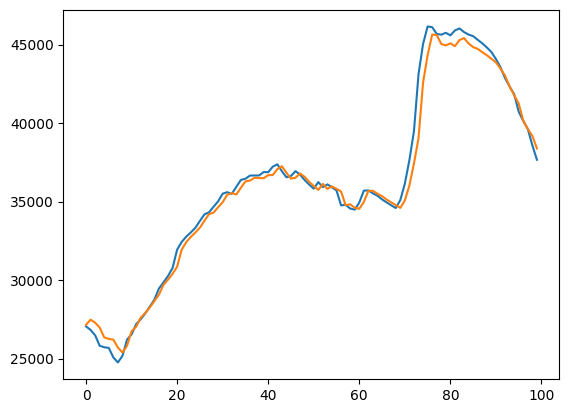

In [10]:
# transformer
from run_Transformer import set_data, run_transformer, transformer_eval

seq_length = 6
epoches = 100
batch_size = 128

train_loader, test_loader, scaler, actual_test = set_data(path, target, seq_length, batch_size)
model = run_transformer(dataset, train_loader, epoches)
predictions = transformer_eval(dataset, model, test_loader, scaler)